# 📉 Stock Analysis: Bollinger Bands

This notebook explores **Bollinger Bands**, a volatility indicator that uses a moving average with upper and lower bands based on standard deviation.  
It helps identify periods of **high or low volatility** and potential **price reversals**.


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


## Step 1: Load Historical Data

We'll fetch 6 months of daily price data for a stock (default: TSLA).


In [2]:
ticker = yf.Ticker("TSLA")
df = ticker.history(period="6mo")
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-17 00:00:00-04:00,221.589996,222.080002,217.899994,220.889999,50791800,0.0,0.0
2024-10-18 00:00:00-04:00,220.710007,222.279999,219.229996,220.699997,49611900,0.0,0.0
2024-10-21 00:00:00-04:00,218.899994,220.479996,215.729996,218.850006,47329000,0.0,0.0
2024-10-22 00:00:00-04:00,217.309998,218.220001,215.259995,217.970001,43268700,0.0,0.0
2024-10-23 00:00:00-04:00,217.130005,218.720001,212.110001,213.649994,80938900,0.0,0.0


## Step 2: Calculate Bollinger Bands

- 20-day **moving average** (middle band)
- 20-day **standard deviation**
- Upper Band = MA + (2 × STD)
- Lower Band = MA - (2 × STD)


In [3]:
df["20MA"] = df["Close"].rolling(window=20).mean()
df["20STD"] = df["Close"].rolling(window=20).std()
df["Upper Band"] = df["20MA"] + (2 * df["20STD"])
df["Lower Band"] = df["20MA"] - (2 * df["20STD"])
df[["Close", "20MA", "Upper Band", "Lower Band"]].tail()


,Close,20MA,Upper Band,Lower Band
Date,,,,
2025-04-10 00:00:00-04:00,252.399994,255.312000,295.109384,215.514617
2025-04-11 00:00:00-04:00,252.309998,255.428500,295.173771,215.683230
2025-04-14 00:00:00-04:00,252.350006,256.145501,295.076755,217.214247
2025-04-15 00:00:00-04:00,254.110001,257.585501,293.746384,221.424618
2025-04-16 00:00:00-04:00,241.550003,257.870001,293.395133,222.344870


## Step 3: Plot the Bollinger Bands

This will show the price, the moving average, and the upper/lower bands.


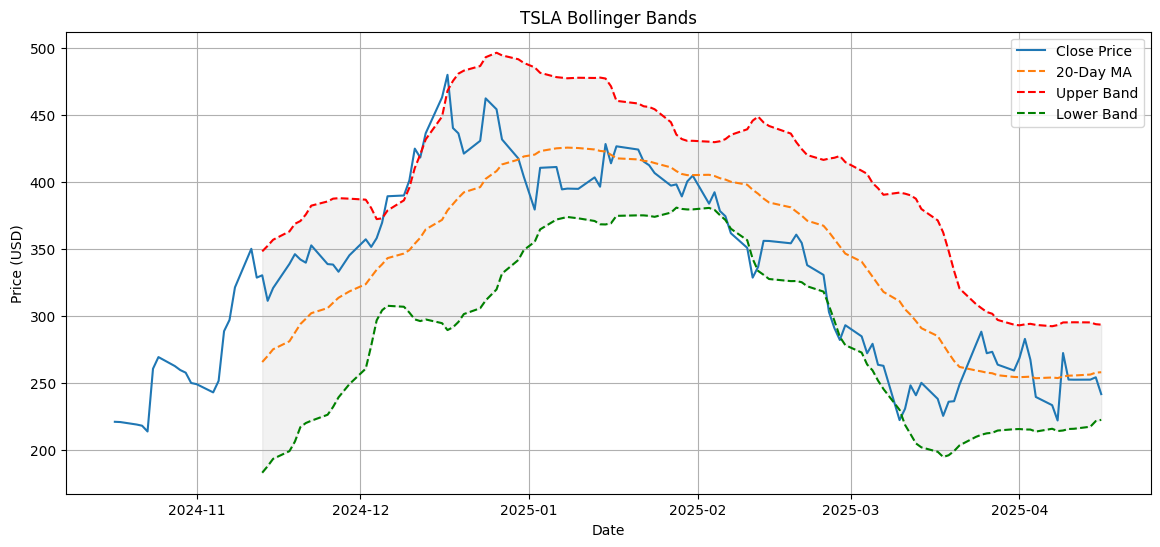

In [4]:
plt.figure(figsize=(14, 6))
plt.plot(df["Close"], label="Close Price", linewidth=1.5)
plt.plot(df["20MA"], label="20-Day MA", linestyle="--")
plt.plot(df["Upper Band"], label="Upper Band", linestyle="--", color="red")
plt.plot(df["Lower Band"], label="Lower Band", linestyle="--", color="green")
plt.fill_between(df.index, df["Lower Band"], df["Upper Band"], color="gray", alpha=0.1)
plt.title("TSLA Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


## Step 4: Interpretation

- When price hits the **upper band**, the stock may be **overbought**
- When price hits the **lower band**, it may be **oversold**
- Bollinger Bands contract during **low volatility** and expand during **high volatility**
- **Price moving outside the bands** can signal a breakout or trend change
